In [2]:
import pandas as pd

In [3]:
pd.read_csv("PublicHospitalDataset.csv", encoding="ISO-8859-1")


,Hypertension,Heart Disease,Married,Work,Residence,Avg_glucose_level,Bmi,Smoking,Gender,Age,Stroke
0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,Male,67.0,1
1,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,Female,61.0,1
2,0,1,Yes,Private,Rural,105.92,32.5,never smoked,Male,80.0,1
3,0,0,Yes,Private,Urban,171.23,34.4,smokes,Female,49.0,1
4,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,Female,79.0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,1,0,Yes,Private,Urban,83.75,NaN,never smoked,Female,80.0,0
5106,0,0,Yes,dsfsdf,Urban,125.20,40.0,never smoked,Female,81.0,0
5107,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,Female,35.0,0
5108,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,Male,51.0,0


In [4]:
!pip install imbalanced-learn

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [6]:

data = pd.read_csv("PublicHospitalDataset.csv", encoding="ISO-8859-1")
data.head(10)
## Displaying top 10 rows
data.info()
## Showing information about datase
data.describe()
## Showing data's statistical features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Hypertension       5110 non-null   int64  
 1   Heart Disease      5110 non-null   int64  
 2   Married            5110 non-null   object 
 3   Work               5110 non-null   object 
 4   Residence          5110 non-null   object 
 5   Avg_glucose_level  5110 non-null   float64
 6   Bmi                4909 non-null   float64
 7   Smoking            5110 non-null   object 
 8   Gender             5110 non-null   object 
 9   Age                5110 non-null   float64
 10  Stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


,Hypertension,Heart Disease,Avg_glucose_level,Bmi,Age,Stroke
count,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000,5110.000000
mean,0.097456,0.054012,106.147677,61.463720,43.226614,0.048728
std,0.296607,0.226063,45.283560,1140.662468,22.612647,0.215320
min,0.000000,0.000000,55.120000,10.300000,0.080000,0.000000
25%,0.000000,0.000000,77.245000,23.500000,25.000000,0.000000
50%,0.000000,0.000000,91.885000,28.100000,45.000000,0.000000
75%,0.000000,0.000000,114.090000,33.100000,61.000000,0.000000
max,1.000000,1.000000,271.740000,40000.000000,82.000000,1.000000


Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: Gender, dtype: int64


<AxesSubplot:xlabel='Gender', ylabel='count'>

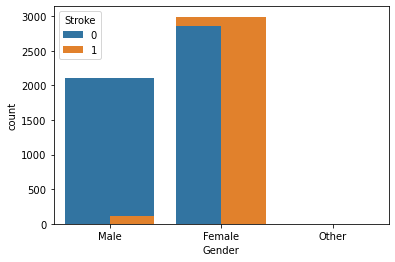

In [7]:
# EDA
#data.drop("id",inplace=True,axis=1)
print('Unique values\n',data['Gender'].unique())
print('Value Counts\n',data['Gender'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='Gender')
# Helps to plot a count plot which will help us to see count of values in each unique category.
sns.countplot(data=data,x='Gender',hue='Stroke')
# This plot will help to analyze how gender will affect chances of stroke.

In [8]:
data['Age'].nunique()

104

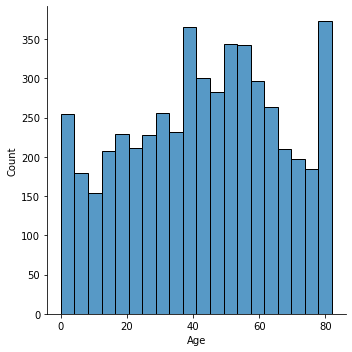

In [9]:
sns.displot(data['Age'])

In [10]:
plt.figure(figsize=(15,7))

<Figure size 1080x504 with 0 Axes>

<Figure size 1080x504 with 0 Axes>

<AxesSubplot:xlabel='Stroke', ylabel='Age'>

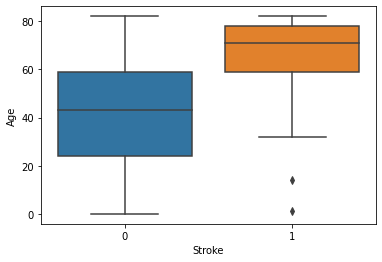

In [11]:
sns.boxplot(data=data,x='Stroke',y='Age')

<AxesSubplot:xlabel='Stroke', ylabel='Age'>

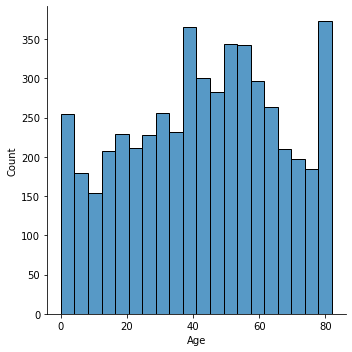

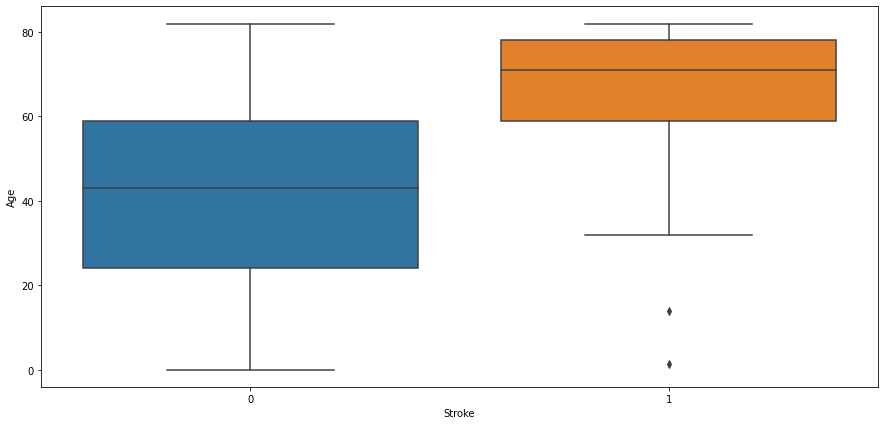

In [12]:
# Hyertension
data['Age'].nunique()
# Returns number of unique values in this attribute
sns.displot(data['Age'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='Stroke',y='Age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: Heart Disease, dtype: int64


<AxesSubplot:xlabel='Heart Disease', ylabel='count'>

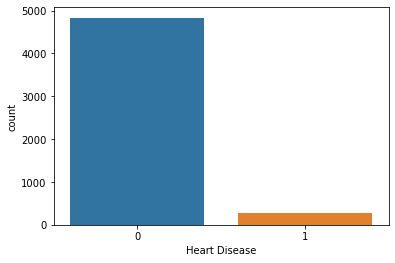

In [13]:
# Heart Disease
print('Unique Value\n',data['Heart Disease'].unique())
print('Value Counts\n',data['Heart Disease'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
sns.countplot(data=data,x='Heart Disease')
# Will plot a counter plot of variable heart diseases

Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: Married, dtype: int64


<AxesSubplot:xlabel='Married', ylabel='count'>

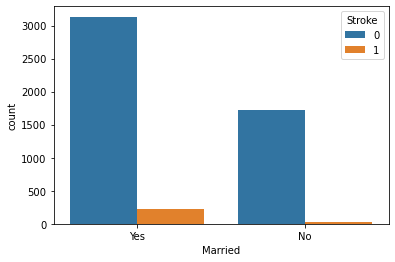

In [14]:
# Ever Married
print('Unique Values\n',data['Married'].unique())
print('Value Counts\n',data['Married'].value_counts())
# Above code will show us number unique values of attribute and its count
sns.countplot(data=data,x='Married',hue='Stroke')

<AxesSubplot:xlabel='Married', ylabel='count'>

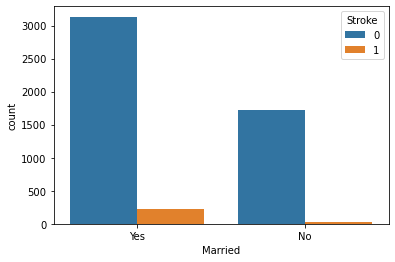

In [15]:
# Counter plot of ever married attribute
sns.countplot(data=data,x='Married',hue='Stroke')
# Ever married with respect of stroke

Unique Value
 ['Private' 'Self-employed' 'k\x96sdh-k' 'Govt_job' 'sdsd-i' 'children'
 'Never_worked' 'dsfsdf' 'sdfsdf']
Value Counts
 Private          2919
Self-employed     818
children          687
Govt_job          657
Never_worked       22
sdfsdf              3
dsfsdf              2
sdsd-i              1
ksdh-k             1
Name: Work, dtype: int64


<AxesSubplot:xlabel='Work', ylabel='count'>

C:\Users\Alejandro\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alejandro\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


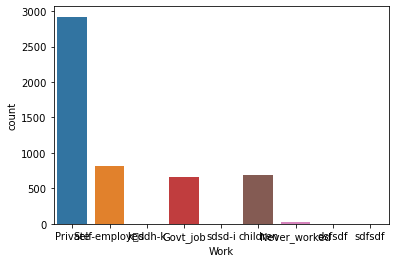

In [16]:
# Work Type
print('Unique Value\n',data['Work'].unique())
print('Value Counts\n',data['Work'].value_counts())
# Above code will return unique values of attributes and its count
sns.countplot(data=data,x='Work')


<AxesSubplot:xlabel='Work', ylabel='count'>

C:\Users\Alejandro\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Alejandro\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 150 missing from current font.
  font.set_text(s, 0, flags=flags)


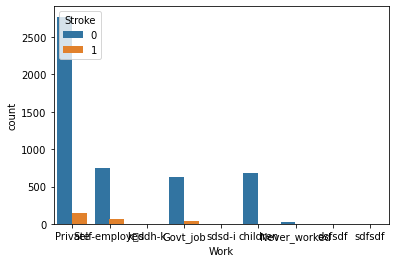

In [17]:
# Above code will create a count plot
sns.countplot(data=data,x='Work',hue='Stroke')
# Above code will create a count plot with respect to stroke

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence, dtype: int64


<AxesSubplot:xlabel='Residence', ylabel='count'>

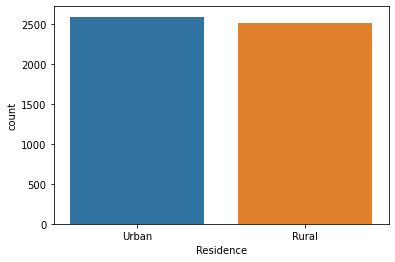

In [18]:
#residence type
print('Unique Values\n',data['Residence'].unique())
print("Value Counts\n",data['Residence'].value_counts())
# Above code will return unique values of variable and its count
sns.countplot(data=data,x='Residence')
# This will create a counter plot


<AxesSubplot:xlabel='Residence', ylabel='count'>

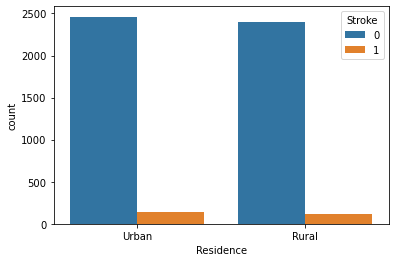

In [19]:
sns.countplot(data=data,x='Residence',hue='Stroke')
# Residence Type with respect to stroke

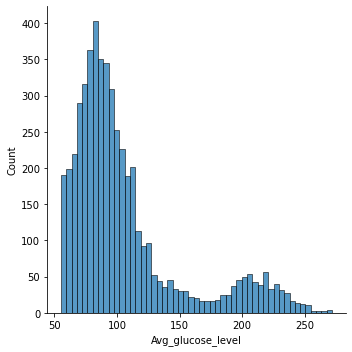

In [20]:
# Average Glucose Level
data['Avg_glucose_level'].nunique()
# Number of unique values
sns.displot(data['Avg_glucose_level'])
# Distribution of avg_glucose_level

<AxesSubplot:xlabel='Stroke', ylabel='Avg_glucose_level'>

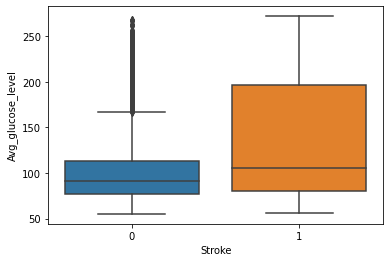

In [21]:
sns.boxplot(data=data,x='Stroke',y='Avg_glucose_level')
# Avg_glucose_level and Stroke

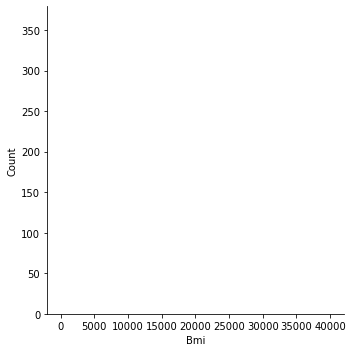

In [22]:
# BMI
data['Bmi'].isna().sum()
# Returns number null values
data['Bmi'].fillna(data['Bmi'].mean(),inplace=True)
# Filling null values with average value
data['Bmi'].nunique()
# Returns number of unique values in that attribute
sns.displot(data['Bmi'])


<AxesSubplot:xlabel='Stroke', ylabel='Bmi'>

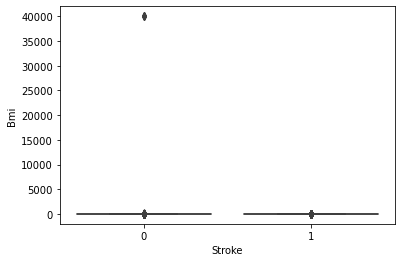

In [23]:
# Distribution of bmi
sns.boxplot(data=data,x='Stroke',y='Bmi')
# BMI with respect to Stroke

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: Smoking, dtype: int64


<AxesSubplot:xlabel='Smoking', ylabel='count'>

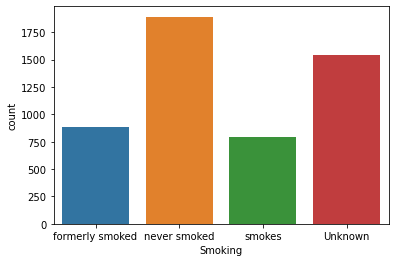

In [24]:
# Smoking Status
print('Unique Values\n',data['Smoking'].unique())
print('Value Counts\n',data['Smoking'].value_counts())
# Returns unique values and its count
sns.countplot(data=data,x='Smoking')
# Count plot of smoking status


<AxesSubplot:xlabel='Smoking', ylabel='count'>

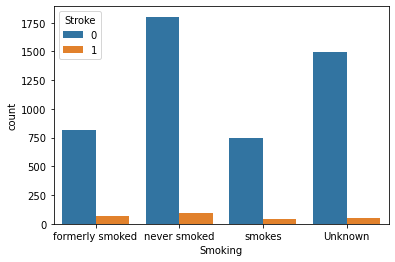

In [25]:
sns.countplot(data=data,x='Smoking',hue='Stroke')
# Smoking Status with respect to Stroke

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: Stroke, dtype: int64


<AxesSubplot:xlabel='Stroke', ylabel='count'>

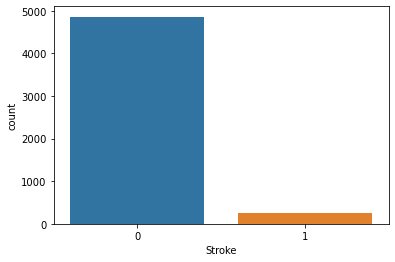

In [26]:
# Stroke
print('Unique Value\n',data['Stroke'].unique())
print('Value Counts\n',data['Stroke'].value_counts())
# Returns Unique Value and its count
sns.countplot(data=data,x='Stroke')
# Count Plot of Stroke

In [27]:
# Feature engeneering
cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

Index(['Married', 'Work', 'Residence', 'Smoking', 'Gender'], dtype='object')
   Hypertension  Heart Disease  Married  Work  Residence  Avg_glucose_level  \
0             0              1        1     2          1             228.69   
1             0              0        1     3          0             202.21   
2             0              1        1     2          0             105.92   
3             0              0        1     2          1             171.23   
4             1              0        1     3          0             174.12   
5             0              0        1     2          1             186.21   
6             1              1        1     2          0              70.09   
7             0              0        0     2          1              94.39   
8             0              0        1     6          0              76.15   
9             0              0        1     2          1              58.57   

        Bmi  Smoking  Gender   Age  Stroke  
0  36.60

<AxesSubplot:>

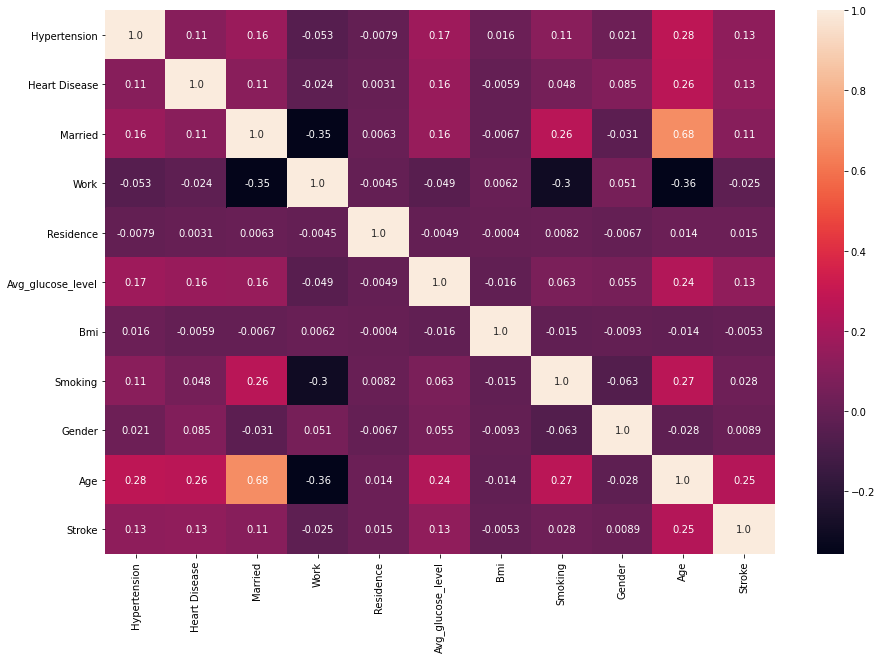

In [28]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.2')

In [29]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('Stroke',axis=1),data['Stroke'])
x=pd.DataFrame(fits.scores_)
columns = pd.DataFrame(data.drop('Stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

,Attribute,Score
9,Age,326.916568
1,Heart Disease,94.698406
5,Avg_glucose_level,90.503870
0,Hypertension,84.953542
2,Married,60.667230
7,Smoking,4.043033
3,Work,3.175200
4,Residence,1.220842
8,Gender,0.407266
6,Bmi,0.141691


In [30]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

0         Hypertension
1        Heart Disease
2              Married
5    Avg_glucose_level
9                  Age
Name: Attribute, dtype: object


In [31]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['Stroke'],random_state=1255,test_size=0.25)
#Splitting data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
# Shape of data

((3832, 5), (1278, 5), (3832,), (1278,))

In [32]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [33]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7296, 5) (7296,) (2426, 5) (2426,)


In [36]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)
xgc.fit(train_x,train_y)
predict=xgc.predict(test_x)
print('Accuracy --> ',accuracy_score(predict,test_y))
print('F1 Score --> ',f1_score(predict,test_y))
print('Classification Report  --> \n',classification_report(predict,test_y))

Accuracy -->  0.9105523495465787
F1 Score -->  0.9051158723218189
Classification Report  --> 
               precision    recall  f1-score   support

           0       0.97      0.87      0.92      1352
           1       0.85      0.96      0.91      1074

    accuracy                           0.91      2426
   macro avg       0.91      0.92      0.91      2426
weighted avg       0.92      0.91      0.91      2426

